In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load the dataset
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Exploratory Data Analysis (EDA)

In [3]:
dataset =df.values
dataset

array([[768805383, 'Existing Customer', 45, ..., 0.061, 9.3448e-05,
        0.99991],
       [818770008, 'Existing Customer', 49, ..., 0.105, 5.6861e-05,
        0.99994],
       [713982108, 'Existing Customer', 51, ..., 0.0, 2.1081e-05,
        0.99998],
       ...,
       [716506083, 'Attrited Customer', 44, ..., 0.0, 0.99788,
        0.00211827],
       [717406983, 'Attrited Customer', 30, ..., 0.0, 0.99671,
        0.00329379],
       [714337233, 'Attrited Customer', 43, ..., 0.189, 0.99662,
        0.00337654]], dtype=object)

In [4]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [5]:
print('Type ',type(df))

Type  <class 'pandas.core.frame.DataFrame'>


Number of rows by the number of columns, aka. shape:

In [6]:
df.shape

(10127, 23)

Numeric features:


In [7]:
cols = df.columns
print("Number of features:", cols.shape)

Number of features: (23,)


In [8]:
num_cols = df._get_numeric_data().columns
print("Number of numerical variables: ",num_cols.shape)
print("Numerical variables:")
num_cols

Number of numerical variables:  (17,)
Numerical variables:


Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Categorical features:

In [9]:
cat_cols =list(set(cols) - set(num_cols))
print("Number of categorical variables: ", len(cat_cols))
print("Categorical variables:")
cat_cols

Number of categorical variables:  6
Categorical variables:


['Income_Category',
 'Attrition_Flag',
 'Gender',
 'Marital_Status',
 'Card_Category',
 'Education_Level']

In [10]:
print( 6/(15+6)*100,'% of the dataset are categorical variables')
print( 15/(15+6)*100,'% of the dataset are numerical variables')

28.57142857142857 % of the dataset are categorical variables
71.42857142857143 % of the dataset are numerical variables


The number of continous Features are :13


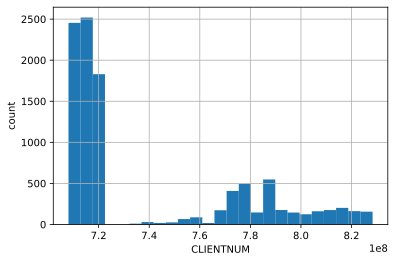

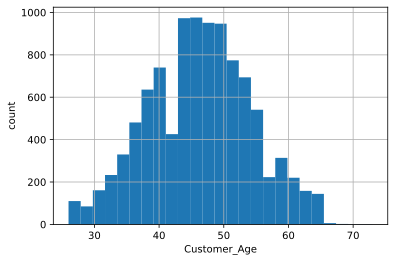

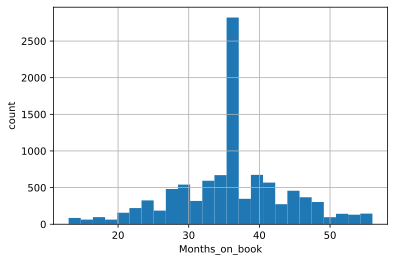

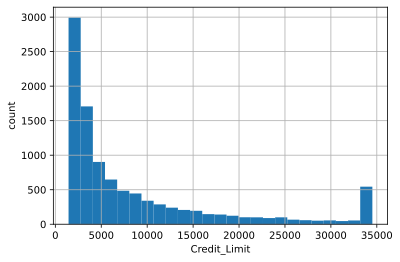

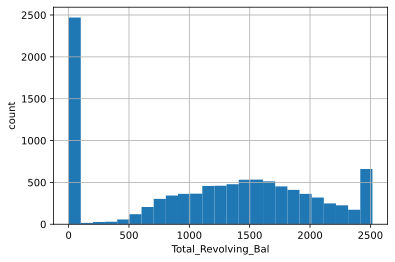

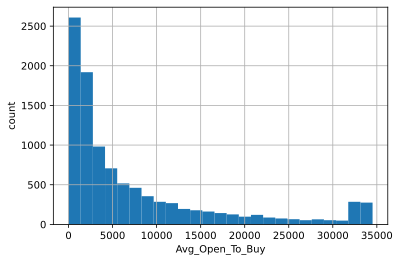

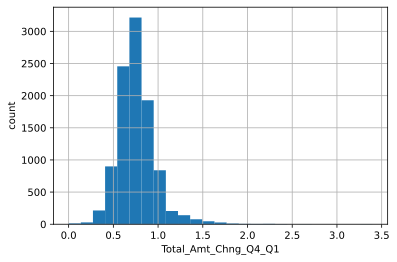

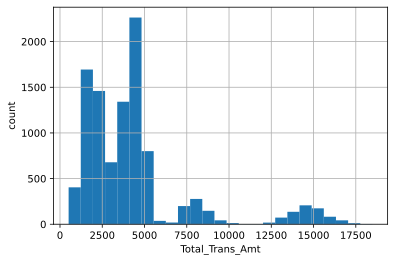

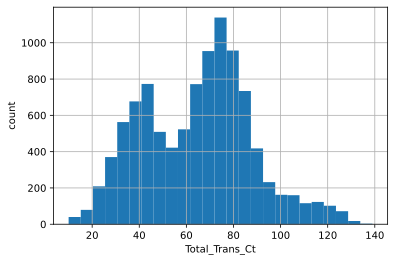

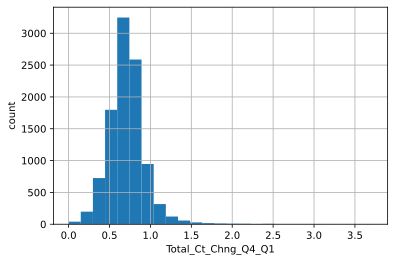

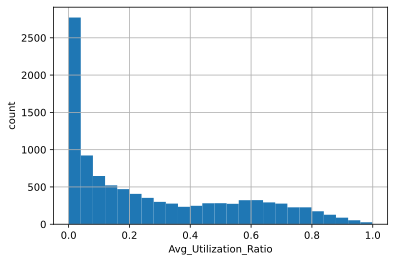

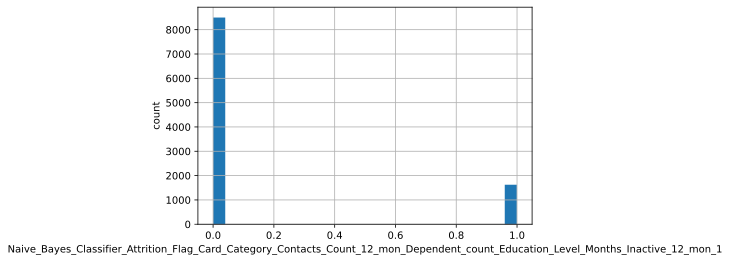

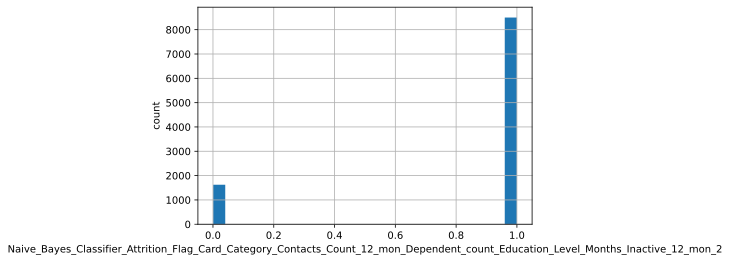

In [11]:
# exploring continous features
continous_feature=[feature for feature in num_cols if len(df[feature].unique())>25 and feature not in ['id']]
print("The number of continous Features are :{}".format(len(continous_feature)))
#performing vizual analysis
for feature in continous_feature:
    df=df.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

Total number of rows in the dataset, names of the columns, their data type, and any missing value:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Summary statistics for numerical columns:

In [13]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Exploring values in categorical variables:

In [14]:
print("Card Categories:")
print("Unique attribute: ",df['Card_Category'].nunique())
print(df['Card_Category'].value_counts())
print("________________________________________")
print("Income Categoryies:")
print("Unique attribute: ",df['Income_Category'].nunique())
print(df['Income_Category'].value_counts())
print("________________________________________")
print("Marital Status:")
print("Unique attribute: ",df['Marital_Status'].nunique())
print(df['Marital_Status'].value_counts())
print("________________________________________")
print("Education Levels:")
print("Unique attribute: ",df['Education_Level'].nunique())
print(df['Education_Level'].value_counts())

Card Categories:
Unique attribute:  4
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
________________________________________
Income Categoryies:
Unique attribute:  6
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
________________________________________
Marital Status:
Unique attribute:  4
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
________________________________________
Education Levels:
Unique attribute:  7
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


Count target Variable:

In [15]:
print("Attrition Flag:")
print(df['Attrition_Flag'].value_counts())

Attrition Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


Pivot table for target variable:

In [16]:
df.pivot_table(index='Attrition_Flag')

,Avg_Open_To_Buy,Avg_Utilization_Ratio,CLIENTNUM,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Months_Inactive_12_mon,Months_on_book,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
Attrition_Flag,,,,,,,,,,,,,,,,,
Attrited Customer,7463.216472,0.162475,7.352614e+08,2.972342,8136.039459,46.659496,2.402581,2.693301,36.178242,0.994909,0.005091,0.694277,0.554386,3.279656,672.822987,3095.025814,44.933620
Existing Customer,7470.273400,0.296412,7.399272e+08,2.356353,8726.877518,46.262118,2.335412,2.273765,35.880588,0.000186,0.999814,0.772510,0.742434,3.914588,1256.604118,4654.655882,68.672588


Some simple graphs using seaborn and matplotlib:

<AxesSubplot:>

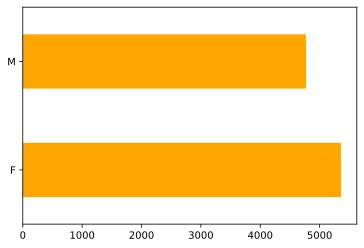

In [17]:
df['Gender'].value_counts().plot.barh(color='orange')

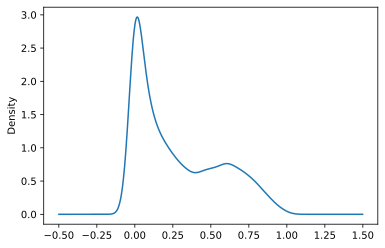

In [18]:
df['Avg_Utilization_Ratio'].plot.kde();

<AxesSubplot:>

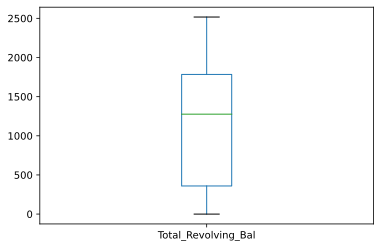

In [19]:
df['Total_Revolving_Bal'].plot.box()

<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Utilization_Ratio'>

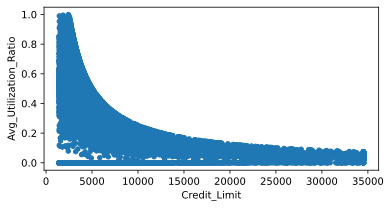

In [20]:
df.plot.scatter(x='Credit_Limit', y='Avg_Utilization_Ratio', figsize=(6,3))

<AxesSubplot:>

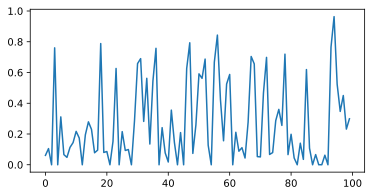

In [21]:
df['Avg_Utilization_Ratio'][:100].plot(figsize=(6,3))

Numer of occurrance of each categorical feature

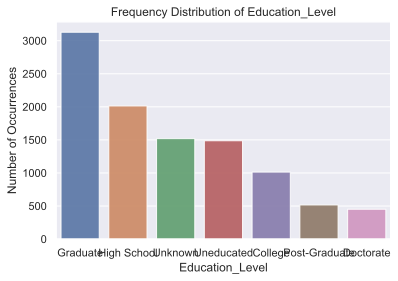

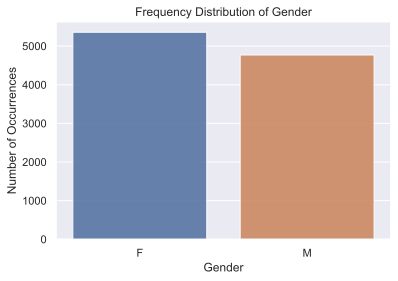

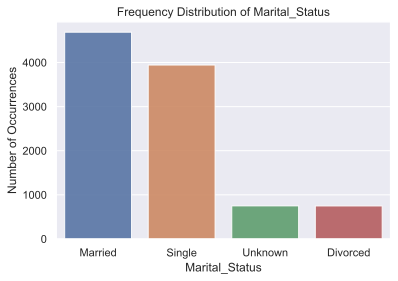

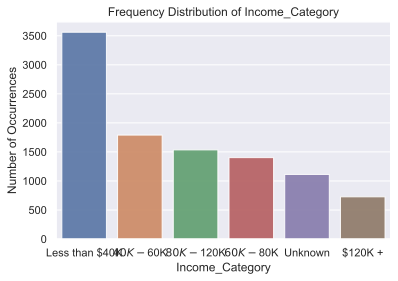

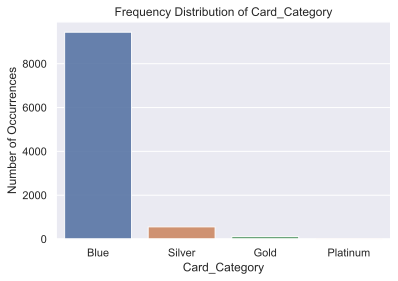

In [22]:

for i in ['Education_Level', 'Gender','Marital_Status','Income_Category','Card_Category']:
    cols_count = df[i].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cols_count.index, cols_count.values, alpha=0.9)
    plt.title(f'Frequency Distribution of {i}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(f'{i}', fontsize=12)
    plt.show()


# Data Cleaning

In [23]:
# Delete unnecessary cols
df = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1, errors="ignore")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
# Find NaN 
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [25]:
# Find Null 
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

No null or NaN value in the dataset

In [26]:
# Clean dublicate
print("before ",df.shape)
df.drop_duplicates( inplace=True)
print("after ",df.shape)

before  (10127, 21)
after  (10127, 21)


So there wasn't any dublicate data.

In [27]:
# Strip cols
df.columns = [column.strip() for column in df.columns]
df.columns 

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Define independent variable X and dependent/ target variable y

In [28]:
X= df.drop(['Attrition_Flag','CLIENTNUM'], axis=1)# independent variable
y=df['Attrition_Flag'] # dependent variable

Split into train and test sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((7088, 19), (7088,), (3039, 19), (3039,))

#### Encode categorical variables in train and test set:

In [30]:
# All object/ categorical features
# X_train.dtypes[df.dtypes == 'object'] Or
X_train.select_dtypes(include=['object']).head(2)

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
80,M,Graduate,Married,$60K - $80K,Blue
1369,F,Uneducated,Married,Less than $40K,Blue


In [31]:
# define one ordinal encoding
ordinal_enc = OrdinalEncoder()
X_train['Education_Level'] =  ordinal_enc.fit_transform(X_train[['Education_Level']]).astype(int)
X_test['Education_Level'] =  ordinal_enc.transform(X_test[['Education_Level']]).astype(int)

X_train['Income_Category'] =  ordinal_enc.fit_transform(X_train[['Income_Category']]).astype(int)
X_test['Income_Category'] =  ordinal_enc.transform(X_test[['Income_Category']]).astype(int)

X_train['Card_Category'] =  ordinal_enc.fit_transform(X_train[['Card_Category']]).astype(int)
X_test['Card_Category'] =  ordinal_enc.transform(X_test[['Card_Category']]).astype(int)

In [32]:
# define one hor/ dummies encoding
X_train = pd.get_dummies(X_train, columns = ['Gender', 'Marital_Status'])
X_test = pd.get_dummies(X_test, columns = ['Gender', 'Marital_Status'])

In [33]:
X_train.head(2)

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
80,47,3,2,2,0,37,4,4,0,8567.0,...,1457,41,1.412,0.198,0,1,0,1,0,0
1369,36,2,5,4,0,36,4,2,2,4066.0,...,3040,56,0.931,0.403,1,0,0,1,0,0


In [34]:
X_train.shape 

(7088, 23)

We can see X_train and test shape changed because of the dummies encoding.

Encode Target variable using LabelEncoder:

In [35]:
label_enc = LabelEncoder()
y_train_enc=label_enc.fit_transform(y_train).astype(int)
y_test_enc=label_enc.transform(y_test).astype(int)

In [36]:
X_train.dtypes

Customer_Age                  int64
Dependent_count               int64
Education_Level               int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Gender_F                      uint8
Gender_M                      uint8
Marital_Status_Divorced       uint8
Marital_Status_Married        uint8
Marital_Status_Single         uint8
Marital_Status_Unknown        uint8
dtype: object

Now we have done encoding categoricals variables

## Oversample imbalance data

 Attiration flag is our target variable so we can see here some imbalance in the dataset so we have to do some extra data engineering.

In [37]:
y_train_enc= pd.Series(y_train_enc)
target_count = y_train_enc.value_counts()

In [38]:
# print class balance
print(f'Class 1 (Exist): {target_count[1]}')
print(f'Class 0 (Attire): {target_count[0]}')
print(f'Proportion: {round(target_count[1] / target_count[0], 2)} : 1')
print(f'Percentage of Majority Class: {round(target_count[1] / sum(target_count), 4)*100}')

Class 1 (Exist): 5949
Class 0 (Attire): 1139
Proportion: 5.22 : 1
Percentage of Majority Class: 83.93


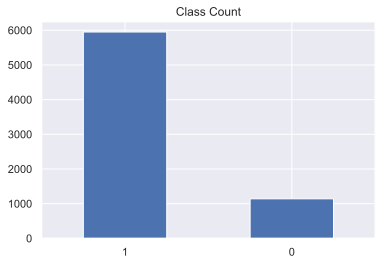

In [39]:
target_count.plot(kind='bar', title='Class Count', rot=0);

#### Oversampling the data:

To use imblearn run the below command: 

In [40]:
# pip install imblearn

In [41]:
import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train_enc == 1) # 1 Existing Customer
n_neg = np.sum(y_train_enc == 0) # 0 Attired Customer
print("Positive: ",n_pos,"Negative: ",n_neg, " in y_train")
ratio = {1 : n_pos , 0 : n_neg * 4}
# randomly oversample negative samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42)
X_train_resampled, y_train_resampled = ROS.fit_resample(X_train, y_train_enc)

Positive:  5949 Negative:  1139  in y_train


In [42]:
y_train_resampled.shape, X_train_resampled.shape

((10505,), (10505, 23))

In [43]:
y_train_resampled.value_counts()

1    5949
0    4556
dtype: int64

#### End oversampling

## Future Selection

In [44]:
X_train_resampled.corr().style.background_gradient(cmap='coolwarm')
# 1 total positive linear correlation, 0 no linear correlation, -1 total negative linear correlation

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
Customer_Age,1.000000,-0.119812,0.009331,-0.015369,-0.011179,0.783004,-0.039571,0.117769,-0.017218,0.015566,0.004130,0.015197,-0.032274,-0.065239,-0.076623,-0.026726,-0.008516,0.014944,-0.014944,-0.030385,0.031438,-0.008850,-0.013454
Dependent_count,-0.119812,1.000000,0.027590,-0.041523,0.020989,-0.103535,-0.053729,-0.007303,-0.035449,0.065270,0.005645,0.064850,-0.038478,0.007674,0.021895,-0.019494,-0.033175,-0.027100,0.027100,0.013241,0.035578,-0.071486,0.052859
Education_Level,0.009331,0.027590,1.000000,-0.007602,-0.013849,-0.003586,-0.005166,-0.008864,0.011995,-0.002916,0.003458,-0.003256,-0.004548,0.002342,-0.006658,0.001087,0.009718,0.000297,-0.000297,-0.008136,0.000404,0.006108,-0.004175
Income_Category,-0.015369,-0.041523,-0.007602,1.000000,-0.039970,-0.021796,0.004586,0.017167,-0.010150,-0.236987,-0.015696,-0.235926,-0.009159,-0.011204,0.026376,-0.010075,0.109339,0.547967,-0.547967,0.014623,-0.021487,0.008972,0.009790
Card_Category,-0.011179,0.020989,-0.013849,-0.039970,1.000000,-0.021546,-0.053569,-0.024997,-0.008917,0.481954,0.029627,0.480018,0.028808,0.183816,0.120713,0.009871,-0.170532,-0.082590,0.082590,-0.008701,-0.036481,0.035554,0.011685
Months_on_book,0.783004,-0.103535,-0.003586,-0.021796,-0.021546,1.000000,-0.025204,0.156932,-0.019354,0.013455,0.005572,0.012942,-0.031777,-0.058072,-0.064663,-0.028363,-0.016737,0.001179,-0.001179,-0.027338,0.013513,0.007949,-0.013690
Total_Relationship_Count,-0.039571,-0.053729,-0.005166,0.004586,-0.053569,-0.025204,1.000000,-0.041676,0.014407,-0.052461,0.036171,-0.056060,0.053243,-0.236584,-0.110182,0.065865,0.075767,0.002906,-0.002906,0.016778,0.024869,-0.025394,-0.016514
Months_Inactive_12_mon,0.117769,-0.007303,-0.008864,0.017167,-0.024997,0.156932,-0.041676,1.000000,0.045530,-0.022182,-0.054853,-0.016921,-0.053404,-0.075027,-0.107128,-0.078265,-0.031420,0.019720,-0.019720,-0.006202,-0.007784,0.004525,0.012521
Contacts_Count_12_mon,-0.017218,-0.035449,0.011995,-0.010150,-0.008917,-0.019354,0.014407,0.045530,1.000000,0.021792,-0.107749,0.032253,-0.076070,-0.122471,-0.178196,-0.125097,-0.099690,-0.015758,0.015758,0.005910,-0.016840,0.017454,-0.006365
Credit_Limit,0.015566,0.065270,-0.002916,-0.236987,0.481954,0.013455,-0.052461,-0.022182,0.021792,1.000000,0.068178,0.995336,0.046008,0.193258,0.106011,0.025722,-0.397529,-0.435060,0.435060,0.028432,-0.049230,0.031576,0.006801


<AxesSubplot:>

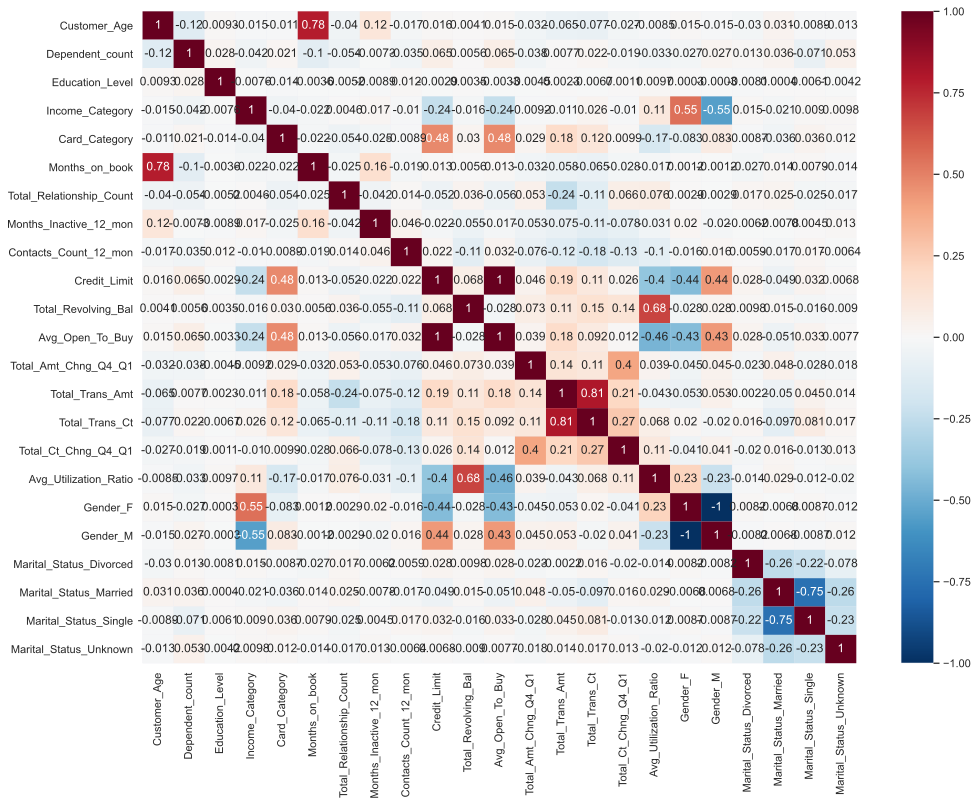

In [45]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
sns.heatmap(X_train_resampled.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


Correlation function is to detect highly correlated features, it will remove one feature that is highly correlated with the other feature.

In [46]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are not interested in absolute coeff value we will remove abs(co...)
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train_resampled, 0.7)
print("No. of correlated features:", len(set(corr_features)))
print("Features: ",corr_features)

No. of correlated features: 3
Features:  {'Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Ct'}


In [48]:
print("Shape before remove correlation: ", X_train_resampled.shape, X_test.shape)
X_train_resampled.drop(corr_features,axis=1, inplace=True )
X_test.drop(corr_features,axis=1, inplace=True )
print("Shape after remove correlation: ", X_train_resampled.shape, X_test.shape)


Shape before remove correlation:  (10505, 23) (3039, 23)
Shape after remove correlation:  (10505, 20) (3039, 20)


Using SelectKBest and chi2 to calculate relevance scores of each feature to the target variable.

In [49]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k=11)  #'all', mutual_info_classif or f_classif
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X_train_fs, X_test_fs, fs = select_features(X_train_resampled, y_train_resampled, X_test)

ٍٍScores calculated for each input feature and the target variable, Choose 11 after navigate all and finding that 11 feature is relevant to target 

In [50]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.003828
Feature 1: 0.002659
Feature 2: 0.002196
Feature 3: 0.004231
Feature 4: 0.004841
Feature 5: 0.028054
Feature 6: 0.038911
Feature 7: 0.038902
Feature 8: 0.276218
Feature 9: 0.273783
Feature 10: 0.148384
Feature 11: 0.415850
Feature 12: 0.220291
Feature 13: 0.187903
Feature 14: 0.009071
Feature 15: 0.006759
Feature 16: 0.000000
Feature 17: 0.005841
Feature 18: 0.000000
Feature 19: 0.000000


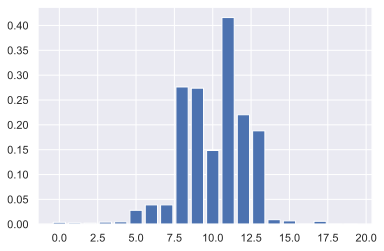

In [51]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [52]:
colnames = X_train_resampled.columns[11], X_train_resampled.columns[8], X_train_resampled.columns[9]
colnames

('Total_Trans_Amt', 'Credit_Limit', 'Total_Revolving_Bal')

Feature 11, 8 and 9 are the most relevant for predicting attrition flag, which is Total Transaction Amount (Last 12 months),Credit Limit and Total Revolving Balance on the Credit Card.

# Modeling

## Logistic Regression Model:

#### GridSearchCv to find the best logistic regression model:

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score
lr_grid = LogisticRegression() 
parameter = { 'C': [0.01,0.1,1,1.05,1.1,1.2,1.3] , 'solver': ['lbfgs','liblinear']} #random_state
lr_grid = GridSearchCV(lr_grid, parameter)
lr_grid.fit(X_train_fs, y_train_resampled)
yhat = lr_grid.predict(X_test_fs)
# Step 4: Evaluate the model
accuracy = accuracy_score(y_test_enc, yhat)
print(f'Model Accuracy: {round(accuracy, 4)*100}')
print('Logistic Regression on Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test_enc, lr_grid.predict(X_test_fs)), roc_auc_score(y_test, lr_grid.predict_proba(X_test_fs)[:,1])))

Model Accuracy: 79.34
Logistic Regression on Train Data; Test F1: 0.870, Test AUC: 0.807


In [54]:
# examine the best model to show you the best value of parameters to make predictions
print("Best params: ", lr_grid.best_params_)
print("Best estimator: ", lr_grid.best_estimator_)
print("Best score: ", lr_grid.best_score_)

Best params:  {'C': 0.01, 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=0.01, solver='liblinear')
Best score:  0.7596382674916706


#### Fit the model with the best   parameter tuning for logistic regression 

In [55]:
from sklearn import metrics
lr = LogisticRegression(C= 1.3, solver= 'liblinear') 
lr.fit(X_train_fs, y_train_resampled)
y_pred = lr.predict(X_test_fs)

In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test_enc, yhat)
print(f'Model Accuracy: {round(accuracy, 4)*100}')
print('Logistic Regression on Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test_enc, yhat), roc_auc_score(y_test_enc, lr.predict_proba(X_test_fs)[:,1])))

Model Accuracy: 79.34
Logistic Regression on Train Data; Test F1: 0.870, Test AUC: 0.814


#### Confusion Matrix 

In [57]:
pd.DataFrame(metrics.confusion_matrix(y_test_enc,yhat), index=['Positive','Negative'], columns=['Positive','Negative'])

,Positive,Negative
Positive,313,175
Negative,453,2098


#### Classification Report

In [58]:
print(metrics.classification_report(y_test_enc,yhat))

              precision    recall  f1-score   support

           0       0.41      0.64      0.50       488
           1       0.92      0.82      0.87      2551

    accuracy                           0.79      3039
   macro avg       0.67      0.73      0.68      3039
weighted avg       0.84      0.79      0.81      3039



## KNN Model

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_fs, y_train_resampled)
y_pred_d = knn.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, y_pred_d)
print(f'Model Accuracy:{round(accuracy, 4)*100}')
print('KNN on Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test_enc, y_pred_d), roc_auc_score(y_test_enc, knn.predict_proba(X_test_fs)[:,1])))

Model Accuracy:85.46000000000001
KNN on Train Data; Test F1: 0.909, Test AUC: 0.875


#### confusion matrix

In [60]:
pd.DataFrame(metrics.confusion_matrix(y_test_enc,y_pred_d), index=['Positive','Negative'], columns=['Positive','Negative'])


,Positive,Negative
Positive,383,105
Negative,337,2214


#### classification report

In [61]:
print(metrics.classification_report(y_test_enc,y_pred_d))

              precision    recall  f1-score   support

           0       0.53      0.78      0.63       488
           1       0.95      0.87      0.91      2551

    accuracy                           0.85      3039
   macro avg       0.74      0.83      0.77      3039
weighted avg       0.89      0.85      0.87      3039



Using GridSearchCV for more efficient parameter tuning 

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# define the parameters values in grid that should be searched
k_range = list(range(0, 11))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [64]:
# instantiate and fit the grid
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
knn_grid.fit(X_train_fs, y_train_resampled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [65]:
# examine the best model to show you the best value of parameters to make predictions
print("Best params: ", knn_grid.best_params_)
print("Best estimator: ", knn_grid.best_estimator_)
print("Best score: ", knn_grid.best_score_)

Best params:  {'n_neighbors': 1, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=1)
Best score:  0.9505979792487877


In [66]:
# train your model using all data and the best known parameters
b_knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
b_knn.fit(X_train_fs, y_train_resampled)
# make a prediction on out-of-sample data
y_pred = b_knn.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, y_pred)
print(f'Model Accuracy:{round(accuracy, 4)*100}')
print('KNN on Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test_enc, y_pred), roc_auc_score(y_test_enc, b_knn.predict_proba(X_test_fs)[:,1])))

Model Accuracy:87.36
KNN on Train Data; Test F1: 0.925, Test AUC: 0.750


#### confusion matrix

In [67]:
pd.DataFrame(metrics.confusion_matrix(y_test_enc,y_pred), index=['Positive','Negative'], columns=['Positive','Negative'])

,Positive,Negative
Positive,277,211
Negative,173,2378


#### classification report

In [68]:
print(metrics.classification_report(y_test_enc,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       488
           1       0.92      0.93      0.93      2551

    accuracy                           0.87      3039
   macro avg       0.77      0.75      0.76      3039
weighted avg       0.87      0.87      0.87      3039



## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 123) # n_estimators = 100, max_features = 3, n_jobs=-1
parameter = {'n_estimators':[1,10,100,200,10000]}
rf_grid = GridSearchCV(rf, parameter,n_jobs=-1)

rf_grid.fit(X_train_fs, y_train_resampled)

GridSearchCV(estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'n_estimators': [1, 10, 100, 200, 10000]})

In [70]:
# examine the best model to show you the best value of parameters to make predictions
print("Best params: ", rf_grid.best_params_)
print("Best estimator: ", rf_grid.best_estimator_)
print("Best score: ", rf_grid.best_score_)

Best params:  {'n_estimators': 10000}
Best estimator:  RandomForestClassifier(n_estimators=10000, random_state=123)
Best score:  0.9818181818181818


In [71]:
# train your model using all data and the best known parameters
rf = RandomForestClassifier(random_state = 123, n_estimators= 10000)
rf.fit(X_train_fs, y_train_resampled)
# make a prediction on out-of-sample data
y_pred = rf.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, y_pred)
print(f'Model Accuracy:{round(accuracy, 4)*100}')
print('random forest on Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test_enc, y_pred), roc_auc_score(y_test_enc, b_knn.predict_proba(X_test_fs)[:,1])))

Model Accuracy:94.89999999999999
random forest on Train Data; Test F1: 0.970, Test AUC: 0.750


#### confusion matrix

In [72]:
pd.DataFrame(metrics.confusion_matrix(y_test_enc,y_pred), index=['Positive','Negative'], columns=['Positive','Negative'])

,Positive,Negative
Positive,396,92
Negative,63,2488


#### classification report

In [73]:
print(metrics.classification_report(y_test_enc,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       488
           1       0.96      0.98      0.97      2551

    accuracy                           0.95      3039
   macro avg       0.91      0.89      0.90      3039
weighted avg       0.95      0.95      0.95      3039

